# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [5]:
pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/332.0 MB 9.0 MB/s eta 0:00:37
    --------------------------------------- 4.5/332.0 MB 11.4 MB/s eta 0:00:29
    --------------------------------------- 6.8/332.0 MB 11.2 MB/s eta 0:00:29
   - -------------------------------------- 9.7/332.0 MB 12.3 MB/s eta 0:00:27
   - -------------------------------------- 13.4/332.0 MB 13.1 MB/s eta 0:00:25
   - -------------------------------------- 16.3/332.0 MB 13.3 MB/s eta 0:00:24
   -- ------------------------------------- 19.1/332.0 MB 13.5 MB/s eta 0:00:24
   -- ------------------------------------- 22.8/332.0 MB 14.0 MB/s eta 0:00:23
   --- ------------------------------------ 25.7/332.0 MB 14.0 MB/s eta 0:00:22
   --- ------------------------------------ 28.6/332.0 MB 14.0 MB/s eta 0:00:22
   --- ------------------------------------ 30.9/332.0 MB 13.7 MB/s eta 0:00:22
   --- ------------------------------------ 33.0/332.0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


Chargement de CIFAR-10...


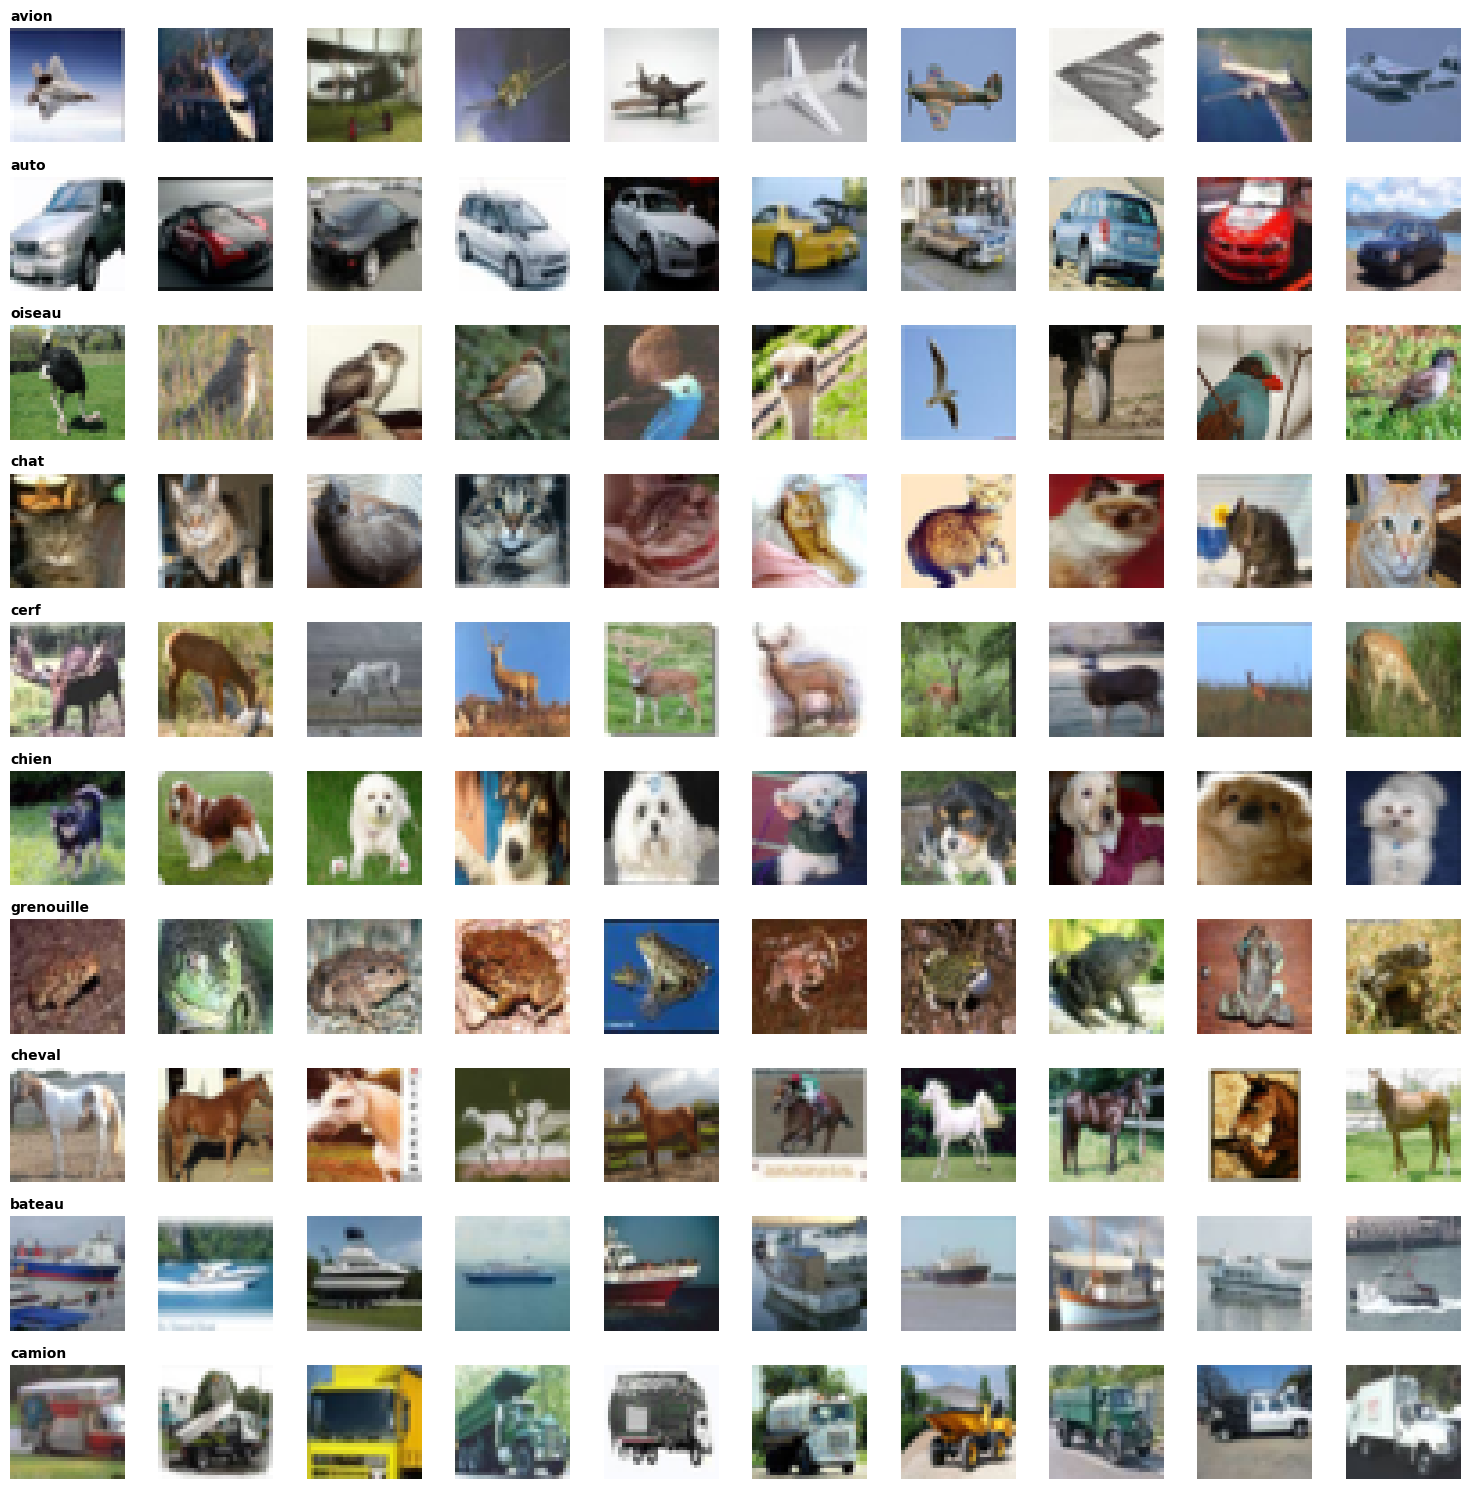

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# load dataset
print("Chargement de CIFAR-10...")
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# name of the classes in  french
class_names = ['avion', 'auto', 'oiseau', 'chat', 'cerf', 'chien', 'grenouille', 'cheval', 'bateau', 'camion']

#  Visualisation : 10 x 10 (10 échantillons par classe)
plt.figure(figsize=(15, 15))
for i in range(10): 
    indices = np.where(y_train == i)[0] 
    selected_indices = np.random.choice(indices, 10, replace=False) # 10 random
    for j in range(10):
        plt.subplot(10, 10, i * 10 + j + 1)
        plt.imshow(X_train[selected_indices[j]])
        plt.axis('off')
        if j == 0:
            plt.title(class_names[i], loc='left', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

#  Normalization  ( [0, 255] to[0, 1])
# C'est crucial pour que le réseau de neurones apprenne plus vite
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#   Convert labels to One-Hot Encoding
# Example: class '3' becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)



## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [ ]:
from keras.backend import clear_session
clear_session()

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# We use Sequential because our layers have  no complex branches
model = Sequential()

#  Convolutional Front-end
# We use 32 filters of size (3,3). 
# Input shape (32, 32, 3) matches the CIFAR-10 image dimensions (32x32 pixels, 3 color channels)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

#  Max Pooling Layer
# This reduces the spatial dimensions (width and height), keeping only the most important features
model.add(MaxPooling2D((2, 2)))

#  Flattening
# We transform the 2D feature maps into a 1D vector so the Dense layers can process them
model.add(Flatten())

#  Dense Classifier
# A hidden layer with 100 neurons to learn complex patterns from the features
model.add(Dense(100, activation='relu'))

#  Output Layer
# 10 units (one for each CIFAR-10 class) with Softmax activation 
# Softmax turns the output into probabilities that sum up to 1.0 
model.add(Dense(10, activation='softmax'))

# Print a summary to see the architecture and number of parameters
model.summary()

c:\Users\rache\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [3]:
from tensorflow.keras.optimizers import SGD

#n Compile the model
# We use categorical_crossentropy because we have 10 classes (one-hot encoded)
# SGD (Stochastic Gradient Descent) is the requested optimizer
model.compile(
    optimizer=SGD(learning_rate=0.01), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

#  Train the model
# We store the training process in a 'history' object to plot results later
history = model.fit(
    X_train, y_train_cat, 
    epochs=50, 
    batch_size=512, 
    validation_data=(X_test, y_test_cat), # Evaluating on test data during training
    verbose=1
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.1683 - loss: 2.2404 - val_accuracy: 0.2251 - val_loss: 2.1810
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.2375 - loss: 2.1323 - val_accuracy: 0.2596 - val_loss: 2.0810
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.2731 - loss: 2.0419 - val_accuracy: 0.3003 - val_loss: 2.0109
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.3058 - loss: 1.9708 - val_accuracy: 0.3199 - val_loss: 1.9395
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.3232 - loss: 1.9219 - val_accuracy: 0.3308 - val_loss: 1.9043
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.3372 - loss: 1.8855 - val_accuracy: 0.3392 - val_loss: 1.8724
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.3481 - loss: 1.8562 - val_accuracy: 0.3439 - val_loss: 1.8450
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3599 - loss: 1.8306 - val_accuracy: 0.3646 - v

*   Plot the cross entropy loss curve and the accuracy curve

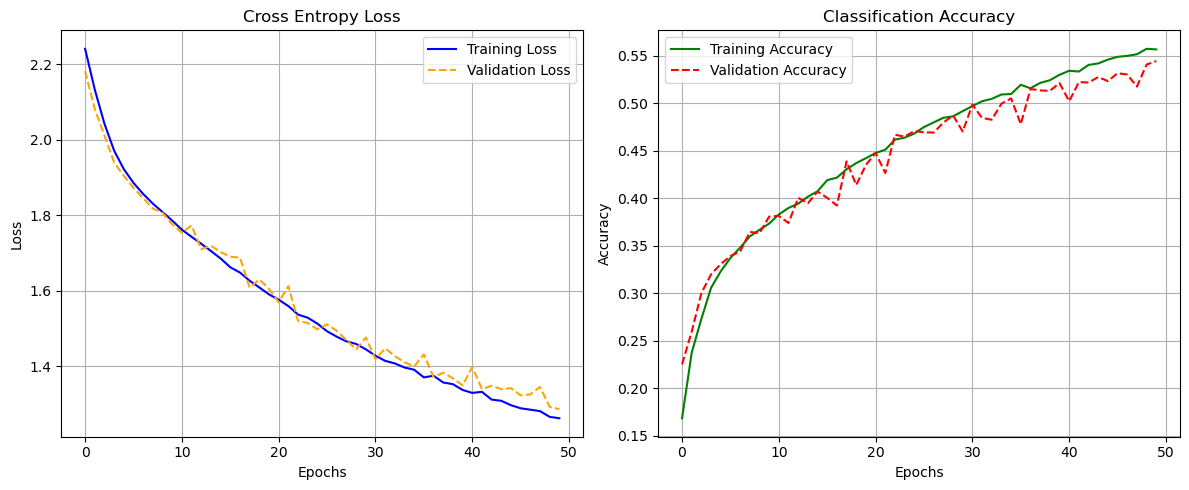

In [4]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(12, 5))

# 1. Plot Cross-Entropy Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
plt.title('Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 2. Plot Classification Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='--')
plt.title('Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [5]:
from keras.backend import clear_session
clear_session()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_vgg = Sequential()

# 1. First VGG Block
# Stacking two Conv layers with 'same' padding to keep dimensions at 32x32
model_vgg.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_vgg.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# 2. Max Pooling
# Reduces the 32x32 image to 16x16
model_vgg.add(MaxPooling2D((2, 2)))

# 3. Transition to Classifier
model_vgg.add(Flatten())

# 4. Dense Layers
# Increased units to 128 as requested for better feature processing
model_vgg.add(Dense(128, activation='relu'))

# 5. Output Layer
model_vgg.add(Dense(10, activation='softmax'))

# Summary to check the depth
model_vgg.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [7]:
from tensorflow.keras.optimizers import SGD

# 1. Compile the deeper model
# We stick to SGD as requested, with a standard learning rate of 0.01
model_vgg.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 2. Train the model
# We store this in 'history_vgg' to distinguish it from your first model
history_vgg = model_vgg.fit(
    X_train, y_train_cat, 
    epochs=50, 
    batch_size=512, 
    validation_data=(X_test, y_test_cat),
    verbose=1
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.1598 - loss: 2.2674 - val_accuracy: 0.2233 - val_loss: 2.2111
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.2592 - loss: 2.1252 - val_accuracy: 0.2769 - val_loss: 2.0364
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.2946 - loss: 2.0006 - val_accuracy: 0.3121 - val_loss: 1.9401
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.3277 - loss: 1.9187 - val_accuracy: 0.3501 - val_loss: 1.8586
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.3521 - loss: 1.8589 - val_accuracy: 0.3476 - val_loss: 1.8346
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.3687 - loss: 1.8046 - val_accuracy: 0.3622 - val_loss: 1.8196
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.3814 - loss: 1.7683 - val_accuracy: 0.3833 - val_loss: 1.7495
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.3932 - loss: 1.7311 - val_accurac

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

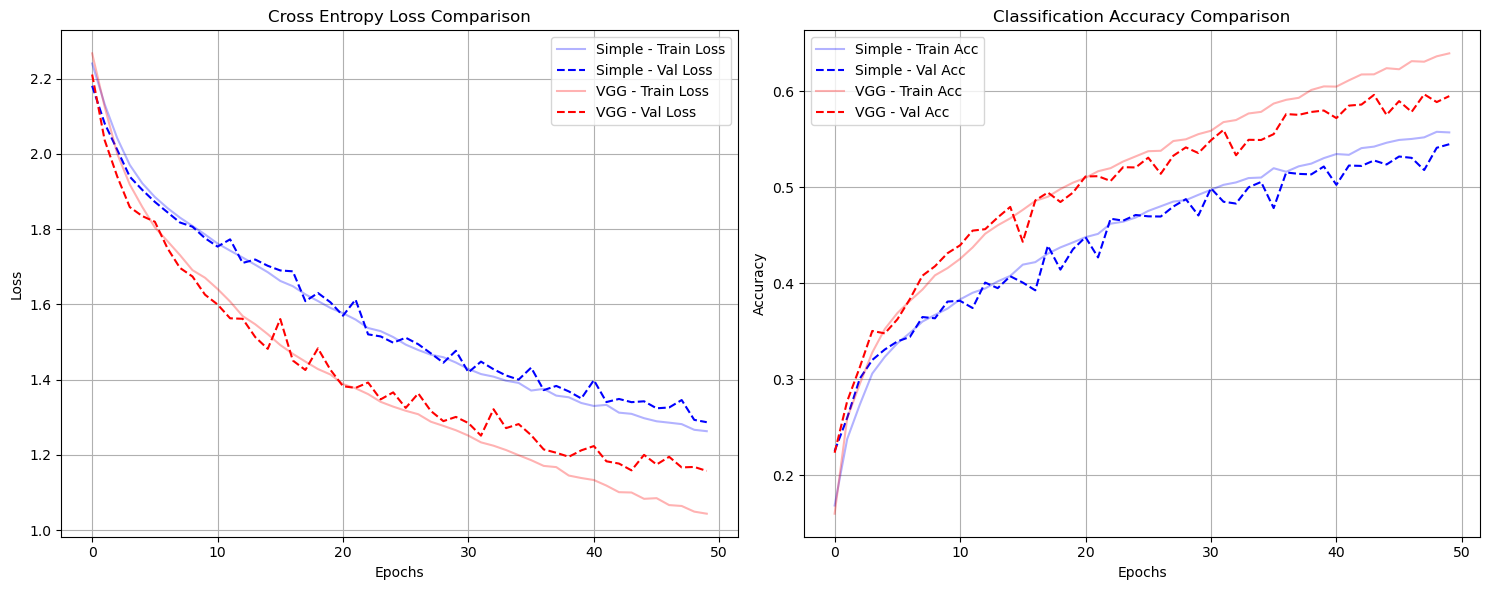

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# -Loss Comparison ---
plt.subplot(1, 2, 1)
# Simple Model
plt.plot(history.history['loss'], label='Simple - Train Loss', color='blue', alpha=0.3)
plt.plot(history.history['val_loss'], label='Simple - Val Loss', color='blue', linestyle='--')
# VGG Model
plt.plot(history_vgg.history['loss'], label='VGG - Train Loss', color='red', alpha=0.3)
plt.plot(history_vgg.history['val_loss'], label='VGG - Val Loss', color='red', linestyle='--')

plt.title('Cross Entropy Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# -- Accuracy Comparison ---
plt.subplot(1, 2, 2)
# Simple Model
plt.plot(history.history['accuracy'], label='Simple - Train Acc', color='blue', alpha=0.3)
plt.plot(history.history['val_accuracy'], label='Simple - Val Acc', color='blue', linestyle='--')
# VGG Model
plt.plot(history_vgg.history['accuracy'], label='VGG - Train Acc', color='red', alpha=0.3)
plt.plot(history_vgg.history['val_accuracy'], label='VGG - Val Acc', color='red', linestyle='--')

plt.title('Classification Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Comment on the observation**

The deeper architecture performs significantly better. Stacking convolutional layers with 'same' padding allows for better feature extraction and higher classification accuracy. This demonstrates that increasing the depth of a Convolutional Neural Network (CNN) is a key factor in improving performance on complex image datasets.

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


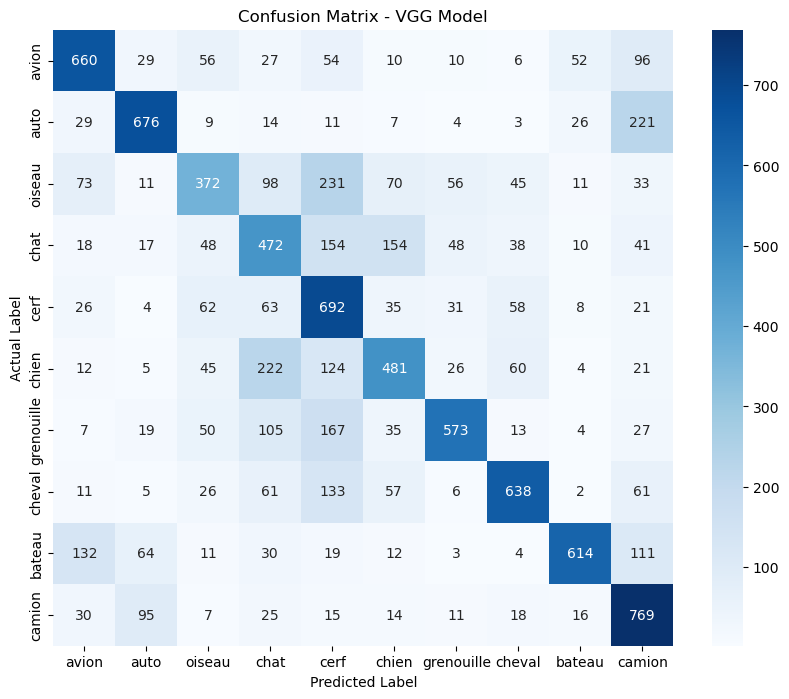

In [9]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#  Predict the output for the test split
# The model returns probabilities for each class
y_pred_probs = model_vgg.predict(X_test, batch_size=512)

#  Convert probabilities to class labels (0 to 9)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
# Convert one-hot encoded test labels back to class labels for comparison
y_true_classes = np.argmax(y_test_cat, axis=1)

#  Generate the Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

#  Plotting using Seaborn for better visibility
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - VGG Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Comment here :**

The confusion matrix reveals that while the deeper VGG model improved overall accuracy, it still encounters difficulty with visually similar classes

Cat vs. Dog: This is the most significant confusion. These two classes share similar silhouettes, textures (fur), and backgrounds, making them hard to distinguish at a 32 x 32 resolution.

Automobile vs. Truck: There is a clear overlap between these two transport classes. Their shared features—such as wheels and metallic surfaces—often lead to misclassification.

Airplane vs. Bird: The model sometimes confuses these because both frequently appear against a similar blue sky background.


...

*    Print the test accuracy for the trained model.

In [10]:
# Evaluate the model on the test set
test_loss, test_acc = model_vgg.evaluate(X_test, y_test_cat, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Test Loss: 1.1571
Test Accuracy: 59.47%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [11]:
from keras.backend import clear_session
clear_session()

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Resizing

model_full_vgg = Sequential([
    #  Resize input from 32x32 to 64x64 (if using CIFAR-10 directly)
    Resizing(64, 64, input_shape=(32, 32, 3)),

    # 2x64 filters
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)), # Output: 32x32

    # Block 2: 2x128 filters
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)), # Output: 16x16

    # Block 3: 2x256 filters
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)), # Output: 8x8

    # Classifier
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_full_vgg.summary()

c:\Users\rache\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
from tensorflow.keras.optimizers import SGD

#  Compile
model_full_vgg.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#  Train (Note: Ensure your X_train/X_test are scaled and y is one-hot)
history_full_vgg = model_full_vgg.fit(
    X_train, y_train_cat, 
    epochs=10, 
    batch_size=512, 
    validation_data=(X_test, y_test_cat),
    verbose=1
)

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions are essential because they introduce non-linearity into the network. Without them, a neural network—no matter how many layers it has—would behave like a simple linear regression model, capable only of learning straight-line relationships.

In the real world, data like images (pixels) have highly complex and "curvy" patterns. Activation functions (like ReLU) allow the model to "bend" its mathematical logic to capture these complex features. They also act as a gate, determining whether a neuron's signal is strong enough to be passed forward to the next layer.

_

2 - Key Differences between sigmoid and softmax:

The main difference lies in how they handle the output probabilities:

Sigmoid: Used for Binary Classification (Yes/No). It maps each output independently to a value between 0 and 1. The sum of all outputs does not have to be 1. It answers: "How likely is this specific class present?"

Softmax: Used for Multi-class Classification (like CIFAR-10). It maps the outputs such that they all range between 0 and 1 and their sum is exactly 1.0 (100%). It creates a probability distribution where the classes compete against each other. It answers: "Which one of these 10 classes is the most likely?"
_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
The choice between these two depends on the number of categories your model is trying to predict:

Binary Crossentropy: Used when there are only two mutually exclusive classes (e.g., Dog vs. Not-Dog). it measures the distance between a single probability and a binary label (0 or 1).

Categorical Crossentropy: Used for multi-class problems (3 or more classes). It compares the model's predicted probability distribution across all classes against the "One-Hot Encoded" target vector. It penalizes the model more severely if it is confident about the wrong class.

_
